In [1]:
import numpy as np
import stanza

snlp = stanza.Pipeline(
    lang='ru',
    #processors='tokenize,pos,depparse',
    dir='stanza_models',
    #tokenize_no_ssplit=True,
    use_gpu=False
)


2020-11-29 04:34:23 INFO: Loading these models for language: ru (Russian):
| Processor | Package   |
-------------------------
| tokenize  | syntagrus |
| pos       | syntagrus |
| lemma     | syntagrus |
| depparse  | syntagrus |
| ner       | wikiner   |

2020-11-29 04:34:23 INFO: Use device: cpu
2020-11-29 04:34:23 INFO: Loading: tokenize
2020-11-29 04:34:23 INFO: Loading: pos
2020-11-29 04:34:24 INFO: Loading: lemma
2020-11-29 04:34:24 INFO: Loading: depparse
2020-11-29 04:34:26 INFO: Loading: ner
2020-11-29 04:34:27 INFO: Done loading processors!


In [2]:
from tqdm import tqdm
# http://vectors.nlpl.eu/repository/
vecs = {}
with open('vecs/model.txt') as f:
    for row in tqdm(f.read().split('\n')[1:-1]):
        cols = row.split()
        vecs[cols[0].split('_')[0]] = np.array(cols[1:]).astype(float)
        

100%|██████████| 189193/189193 [00:30<00:00, 6204.93it/s]


In [3]:
np.array(list(vecs.values())).shape

(154616, 300)

## Исходные тексты

In [4]:
per1 = '''Кроме того, 19.05.2015 года в период времени с 17 часов 00 минут местного времени до 17
часов 32 минут местного времени, более точное время предварительным следствием не установлено, находясь в нерабочем тамбуре плацкартного вагона No 14 пассажирского поезде No 98 сообщением «Кисловодск-Тында», в пути следования по маршруту от ст. Исилькуль до ст. Омск-Пассажирский, Митьковский М.П. увидел находящийся на зарядке над окном мобильный телефон марки «Iphone 4s» в корпусе белого цвета и в этот момент у него вновь возник преступный умысел, направленный на тайное хищение чужого имущества, а именно мобильного телефона марки «Iphone 4s» в корпусе белого цвета, после чего с похищенным имуществом с места преступления скрыться и распорядится им по своему усмотрению, а именно продать с целью получения материальной выгоды.
19.05.2015 года в период времени с 17 часов 00 минут местного времени до 17 часов 32 минут местного времени, более точное время предварительным следствием не установлено, Митьковский М.П., реализуя свой внезапно возникший преступный умысел, направленный на тайное хищение мобильного телефона марки «Iphone 4s» в корпусе белого цвета, находясь в нерабочем тамбуре плацкартного вагона No 14 пассажирского поезде No 98 сообщением «Кисловодск-Тында», в пути следования по маршруту от ст. Исилькуль до ст. Омск- Пассажирский, тайно, действуя умышленно, из корыстных побуждений, осознавая общественную опасность своих действий, предвидя наступление общественно опасных последствий, и желая их наступления, убедившись, что за его действиями никто не наблюдает, тайно похитил, сняв с зарядного устройства, мобильный телефон марки «Iphone 4s» - IMEI 013532009242428 в корпусе белого цвета стоимостью 13 500 рублей, сим-карту сотового оператора «МТС» с абонентским номером +7-983-528-85-72 и чехол, материальной ценности не представляющие, и принадлежащие несовершеннолетней Совуновой Анастасии Вадимовне, 23.03.1999 года рождения, следовавшей в том же вагоне, того же поезда, после чего с похищенным имуществом Митьковский М.П. с места преступления скрылся, причинив своими действиями Совуновой А.В. значительный материальный ущерб на общую сумму 13 500 рублей.
'''.replace('\n', ' ')
per2 = '''11.05.2015 года она с напарником по цирковой студии Галич Денисом Юрьевичем поехали в г. Челябинск на выступление в ледовой арене «Трактор». 19.05.2015 года она с Галич Д.Ю. возвращались обратно в г. Омск, для чего на станции Челябинск они осуществили посадку в пассажирский поезд No 098 сообщением «Кисловодск-Тында» в вагон No 14 на места No 22, 24, 26. На одном месте находился реквизит. Осуществив посадку и заняв свои места они легли спать, телефон был все время при ней, однако перед тем как лечь спать он выключился, т.к. сел заряд аккумулятора. Проснувшись утром по станции Петропавловск они находились на своих местах, так как в вагоне работали пограничники, проводили проверку пассажиров. В вагоне было много пассажиров, некоторые из них в пути следования распивали спиртные напитки. В том числе в вагоне из числа пассажиров были военнослужащие, других отличительных признаков она не запомнила. После того как проводник прошел по вагону и предупредил, что до станции Омск оставалось около 15 минут, она решила пойти поставить свой мобильный телефон на зарядку для того, чтобы позвонить маме и сказать о прибытии поезда. Так, она прошла в нерабочий тамбур, где напротив туалета над окном поставила свой мобильный телефон заряжаться, положив его на верхний уступ окна. В момент, когда она ставила телефон на зарядку, в тамбуре напротив туалета стоял проводник вагона, он видел все еѐ действия. Проводник дожидался пассажира, который находился в туалете, для того чтобы закрыть туалет перед прибытием на станцию Омск. Поставив телефон на зарядку она решила вернуться на свое место, через минуту за ней вышел из тамбура проводник и прошел к себе. Она находилась на своем месте около 7-10 минут, после чего решила проверить свой мобильный телефон. Также у неѐ вызвала подозрение женщина, на вид цыганка, которая прошла в сторону туалета. Так, подойдя к нерабочему тамбуру, она увидела, что в розетке осталось только зарядное устройство от еѐ мобильного телефона, самого телефона не было. Она сразу поняла, что его похитили и пошла к проводнику, сообщила о случившемся, на что проводник ответил что по станции Омск вызовет сотрудников полиции для разбирательств.
По прибытию на станцию Омск в вагон зашли сотрудники полиции, которым она указала на место где стоял телефон на зарядке и устно объяснила, что случилось. После этого она сошла по станции Омск вместе с одним из сотрудников полиции и проследовали в дежурную часть Омского ЛУ МВД России, где в присутствии мамы – Совуновой Аллы Николаевны она написала заявление и еѐ опросили сотрудники полиции по факту случившегося.
Мобильный телефон у неѐ был марки «Iphone» модель «4s», IMEI 013532009242428 в корпусе белого цвета. На момент хищения мобильный телефон находился в чехле черного цвета, на задней стенке чехла изображена девушка с фотоаппаратом. Телефон не имел трещин, сколов иных механических повреждений. Мобильный телефон приобретался за 18 000 рублей примерно в сентябре 2014 года, при этом в данную сумму входила его настройка. В настоящее время с учетом износа, она оценивает мобильный телефон в 13 500 рублей 00 копеек Чехол для неѐ материальной ценности не представляет. На момент хищения в мобильном телефоне находилась сим-карта оператора ОАО «МТС» с абонентским номером +79835288572. Сим-карта материальной ценности сим-карта для неѐ не представляет, денежных средств на момент хищения на сим-карте не было. Данный абонентский номер оформлен на еѐ отца – Совунова Вадима Евгеньевича.
За выступления в цирковой группе она получает денежные средства. Оплата за их выступления сдельная, выступают на бездоговорной основе. В среднем один час выступления стоит от 1 500 рублей, в зависимости от сложности номера. В месяц примерно она зарабатывает от 8 000 до 10 000 рублей. Именно с данных денежных средств был куплен похищенный у неѐ мобильный телефон, кроме того, из заработанных денег - часть заработка идет на оплату поездок, покупку билетов на транспорт, поэтому, в силу того, что она еще обучается в школе, постоянного заработка не имеет, и находится на иждивении у родителей в связи с чем, ущерб на сумму 13 500
4
рублей 00 копеек причиненный ей, является для неѐ значительным. Мобильный телефон покупался в рассрочку, которая была оформлена на еѐ маму – Совунову А.Н., однако денежные средства вносила она, по мере их получения за выступления.
'''.replace('\n', ' ')

In [5]:
doc1 = snlp(per1)
doc2 = snlp(per2)

In [6]:
mean_vecs1 = []
for s in doc1.sentences:
    s_vecs = []
    for w in s.words:
        if w.upos in ('VERB', 'NOUN'):
            try:
                s_vecs.append(vecs[w.lemma])
            except KeyError:
                pass
    if s_vecs:
        mean_vecs1.append(np.vstack(s_vecs).sum(0))
    else:
        mean_vecs1.append(np.zeros((300,)))
        
mean_vecs1 = np.vstack(mean_vecs1)
mean_vecs1.shape


(6, 300)

In [7]:
mean_vecs2 = []
for s in doc2.sentences:
    s_vecs = []
    for w in s.words:
        if w.upos in ('VERB', 'NOUN'):
            try:
                s_vecs.append(vecs[w.lemma])
            except KeyError:
                pass
    if s_vecs:
        mean_vecs2.append(np.vstack(s_vecs).sum(0))
    else:
        mean_vecs2.append(np.zeros((300,)))
        
mean_vecs2 = np.vstack(mean_vecs2)
mean_vecs2.shape


(33, 300)

## Общие точки

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

sims = cosine_similarity(mean_vecs1, mean_vecs2)

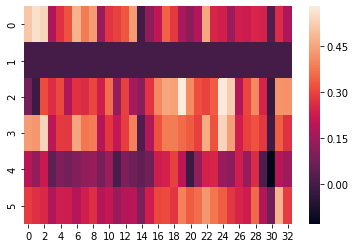

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(sims)
plt.show()


In [10]:
from itertools import product

sims_rate = []
for i1, i2 in product(range(sims.shape[0]), range(sims.shape[1])):
    sims_rate.append({'s_1_id': i1, 's_2_id': i2,'sim': sims[i1, i2] })
    
import pandas as pd

df = pd.DataFrame(sims_rate)
df = df.sort_values(by='sim', ascending=False)
df.head()

,s_1_id,s_2_id,sim
85,2,19,0.579871
90,2,24,0.574677
1,0,1,0.559564
2,0,2,0.540910
123,3,24,0.537742


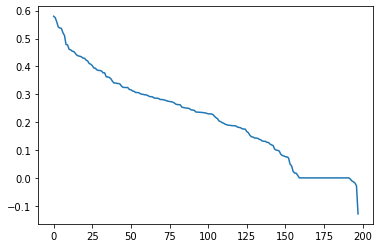

In [11]:
plt.plot(df.sim.values)

In [12]:
x = []
while not df.empty:
    top = df.iloc[0].to_dict()
    if top['sim'] <=0:
        break
    x.append(top)
    df = df.query(f's_1_id > {top["s_1_id"]} & s_2_id > {top["s_2_id"]}')

x


[{'s_1_id': 2.0, 's_2_id': 19.0, 'sim': 0.5798707308135782},
 {'s_1_id': 3.0, 's_2_id': 24.0, 'sim': 0.5377417980369308},
 {'s_1_id': 5.0, 's_2_id': 31.0, 'sim': 0.4785025078121541}]

## Суммаризация

In [13]:
i1, i2 = 0, 0
for time in x:
    print('\n'  + '=' * 20, ' Митьковский')
    print(' '.join([s.text for s in doc1.sentences[i1:int(time["s_1_id"])]]))
    print('\n'  + '=' * 20, 'Совунова')
    print(' '.join([s.text for s in doc2.sentences[i2:int(time["s_2_id"])]]))
    i1, i2 = int(time["s_1_id"]), int(time["s_2_id"])
    
print('\n'  + '=' * 20, 'Митьковский')
print(' '.join([s.text for s in doc1.sentences[int(time["s_1_id"]):]]))
print('\n'  + '=' * 20, 'Совунова')
print(' '.join([s.text for s in doc2.sentences[int(time["s_2_id"]):]]))



====================  Митьковский
Кроме того, 19.05.2015 года в период времени с 17 часов 00 минут местного времени до 17 часов 32 минут местного времени, более точное время предварительным следствием не установлено, находясь в нерабочем тамбуре плацкартного вагона No 14 пассажирского поезде No 98 сообщением «Кисловодск-Тында», в пути следования по маршруту от ст. Исилькуль до ст.

==================== Совунова
11.05.2015 года она с напарником по цирковой студии Галич Денисом Юрьевичем поехали в г. Челябинск на выступление в ледовой арене «Трактор». 19.05.2015 года она с Галич Д.Ю. возвращались обратно в г. Омск, для чего на станции Челябинск они осуществили посадку в пассажирский поезд No 098 сообщением «Кисловодск-Тында» в вагон No 14 на места No 22, 24, 26. На одном месте находился реквизит. Осуществив посадку и заняв свои места они легли спать, телефон был все время при ней, однако перед тем как лечь спать он выключился, т.к. сел заряд аккумулятора. Проснувшись утром по станции Пе